In [3]:
import sys
sys.path.append("../")
from src.utils.db_config import dataload

df_data, df_domains_location, df_traffic = dataload()

Top and Bottom 10 Websites by News Article Count

In [4]:
# Group by website and count articles
article_counts = df_data['source_name'].value_counts()
# Top 10 websites with most articles
top_10_websites = article_counts.head(10)
bottom_10_websites = article_counts.tail(10)
# Display results
print("Top 10 Websites with Most Articles:")
print(top_10_websites)
print("\nBottom 10 Websites with Least Articles:")
print(bottom_10_websites)

Top 10 Websites with Most Articles:
source_name
etf daily news        16631
the times of india     7629
globenewswire          5485
forbes                 4423
biztoccom              3968
bbc news               3342
globalsecurityorg      3093
business insider       2746
abc news               2188
marketscreenercom      1948
Name: count, dtype: int64

Bottom 10 Websites with Least Articles:
source_name
dynomightnet          1
abnormalreturnscom    1
drbie                 1
oreillycom            1
perthirtysixcom       1
beagleboardorg        1
heise online          1
kclacuk               1
ideophoneorg          1
bontermscom           1
Name: count, dtype: int64


/tmp/ipykernel_26199/4044674029.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_websites.values, y=top_10_websites.index, palette="viridis")


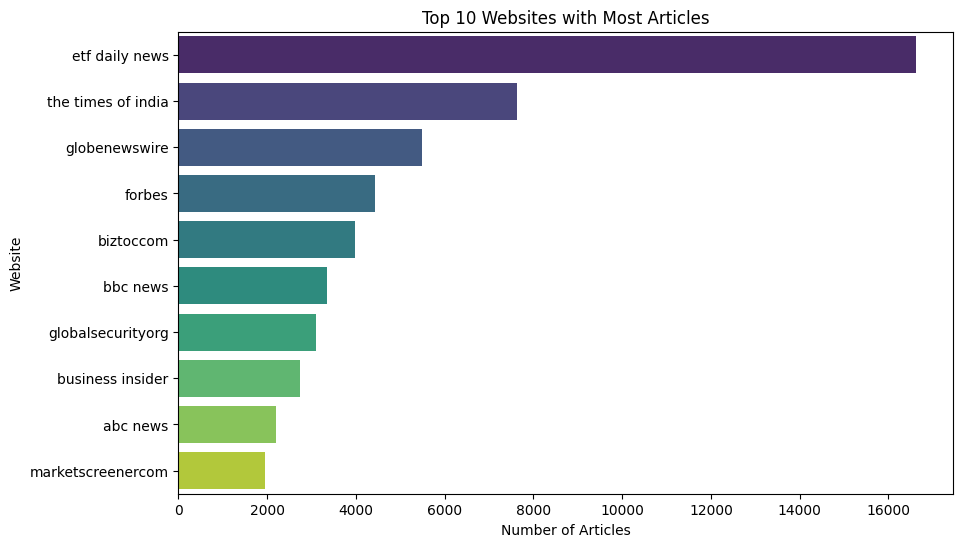

/tmp/ipykernel_26199/4044674029.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_10_websites.values, y=bottom_10_websites.index, palette="magma")  # Create a bar plot for the bottom 10 websites using the 'magma' color palette


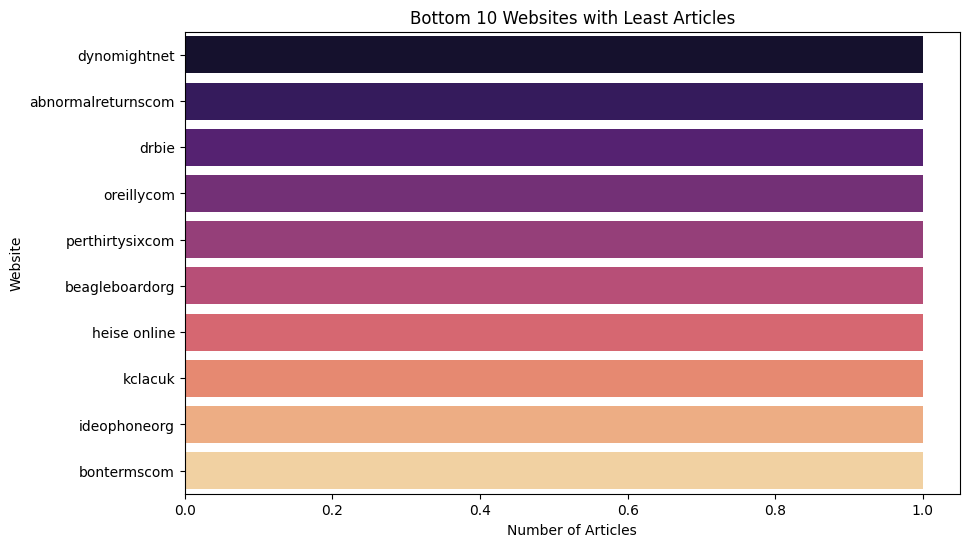

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the Top 10 Websites
plt.figure(figsize=(10, 6))  # Create a figure with a specified size of 10x6 inches
# Create a bar plot for the top 10 websites using the 'viridis' color palette
sns.barplot(x=top_10_websites.values, y=top_10_websites.index, palette="viridis")  
plt.title("Top 10 Websites with Most Articles")  # Set the title of the plot
plt.xlabel("Number of Articles")  # Label the x-axis as "Number of Articles"
plt.ylabel("Website")  # Label the y-axis as "Website"
plt.show()  # Display the plot

# Plot the Bottom 10 Websites
plt.figure(figsize=(10, 6))  # Create a new figure with the same size of 10x6 inches
sns.barplot(x=bottom_10_websites.values, y=bottom_10_websites.index, palette="magma")  # Create a bar plot for the bottom 10 websites using the 'magma' color palette
plt.title("Bottom 10 Websites with Least Articles")  # Set the title of the plot
plt.xlabel("Number of Articles")  # Label the x-axis as "Number of Articles"
plt.ylabel("Website")  # Label the y-axis as "Website"
plt.show()  # Display the plot

Websites with the Highest Visitor Traffic

In [6]:
df_traffic['CompositeScore'] = (
    (1 / df_traffic['GlobalRank'].replace(0, 1)) +  # Inverse GlobalRank, avoid division by zero
    df_traffic['RefSubNets'] +
    df_traffic['RefIPs']
)

# Sort websites by the composite score in descending order
top_websites = df_traffic.sort_values(by='CompositeScore', ascending=False)

# Display top 10 websites with highest visitor traffic
top_10_websites = top_websites.head(10)

print("Top 10 Websites with Highest Visitor Traffic:")
print(top_10_websites[['Domain', 'CompositeScore']])

Top 10 Websites with Highest Visitor Traffic:
                 Domain  CompositeScore
1           facebookcom    2.716056e+06
0             googlecom    2.622633e+06
2            youtubecom    2.273574e+06
3            twittercom    2.162112e+06
4          instagramcom    1.962831e+06
5           linkedincom    1.656473e+06
8   googletagmanagercom    1.117958e+06
9          wikipediaorg    1.077996e+06
6              applecom    1.068381e+06
10         wordpressorg    1.066657e+06


/tmp/ipykernel_26199/2065230069.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CompositeScore', y='Domain', data=top_10_websites, palette='viridis')


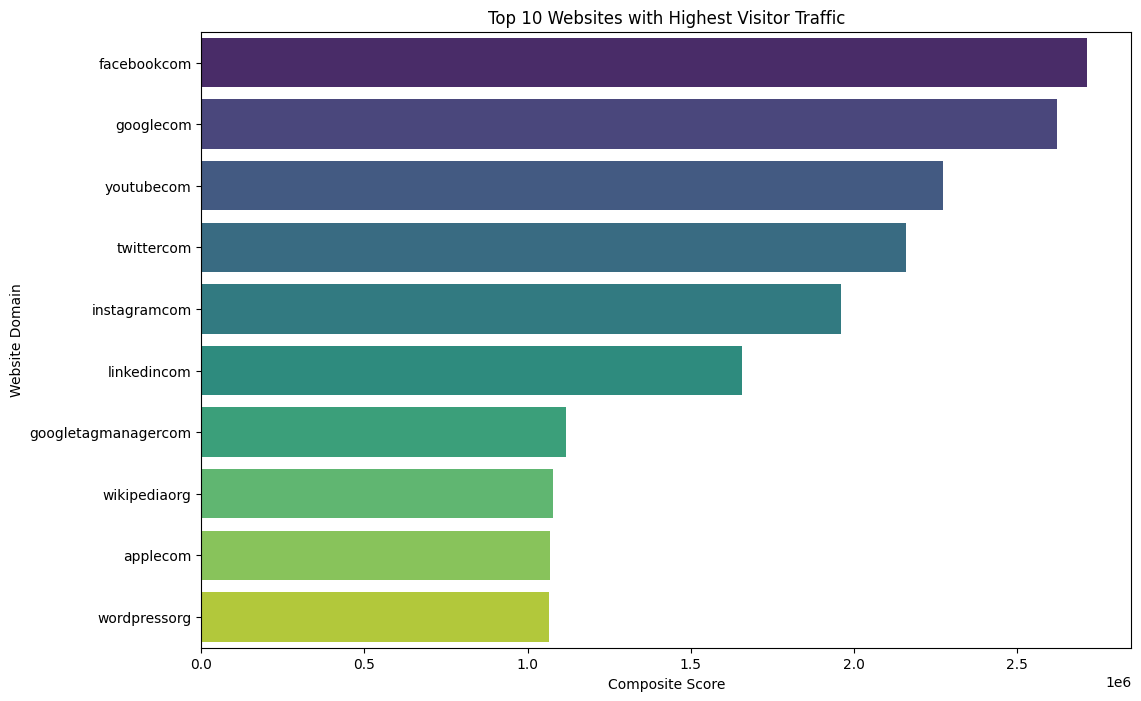

In [7]:
# Plot the Top 10 Websites by Composite Score
plt.figure(figsize=(12, 8))

# Create a barplot with 'Domain' on the y-axis and 'CompositeScore' on the x-axis
sns.barplot(x='CompositeScore', y='Domain', data=top_10_websites, palette='viridis')

# Add titles and labels
plt.title('Top 10 Websites with Highest Visitor Traffic')
plt.xlabel('Composite Score')
plt.ylabel('Website Domain')

# Display the plot
plt.show()

Countries with Many Articles Written About Them

In [9]:
df_data.columns

Index(['article_id', 'source_name', 'author', 'title', 'description', 'url',
       'url_to_image', 'published_at', 'content', 'category', 'full_content'],
      dtype='object')

In [11]:
df_domains_location.columns

Index(['SourceCommonName', 'location', 'Country'], dtype='object')

Merge DataFrames

Join df_data and df_domains_location on the source_name and SourceCommonName to associate each article with its corresponding country

In [14]:
import pandas as pd
merged_df = pd.merge(df_data, df_domains_location, left_on='source_name', right_on='SourceCommonName', how='left')

Check Mentions

In [15]:
# Define a function to check if content mentions the country
def mentions_country(text, country):
    if pd.isna(text) or pd.isna(country):
        return False
    return country.lower() in text.lower()

# Create a column for whether an article mentions the country
merged_df['mentions_country'] = merged_df.apply(
    lambda row: any(
        mentions_country(row[column], row['Country'])
        for column in ['title', 'content', 'full_content']
    ), axis=1
)

Count and Plot: 
Aggregate the count of articles mentioning each country and visualize the results using a bar chart.

In [16]:
# Count articles mentioning each country
country_article_counts = merged_df[merged_df['mentions_country']].groupby('Country').size()

print("Number of Articles Mentioning Each Country:")
print(country_article_counts)

Number of Articles Mentioning Each Country:
Country
australia           1
china               8
germany             1
greece             10
india               3
iran                1
ireland            50
israel              2
japan               9
malaysia            4
romania             4
russia              2
taiwan              1
thailand            1
united states    1122
vietnam             3
dtype: int64


/tmp/ipykernel_26199/723673280.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ArticleCount', y='Country', data=country_article_counts, palette='viridis')


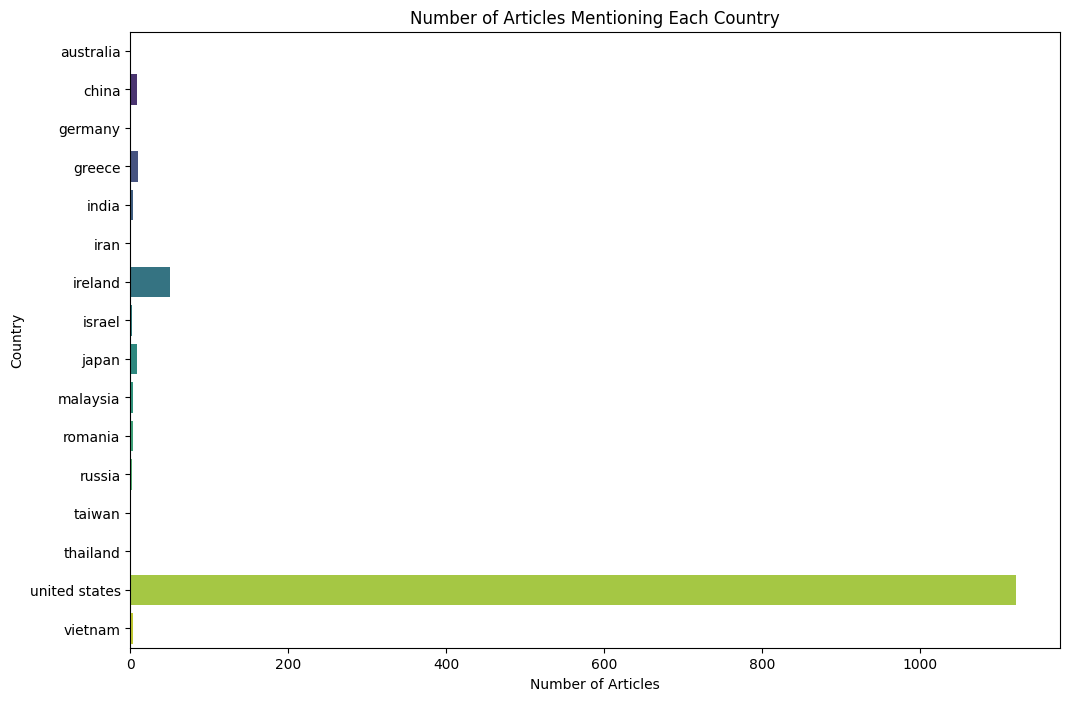

In [17]:
# Prepare the data for plotting
country_article_counts = country_article_counts.reset_index(name='ArticleCount')

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='ArticleCount', y='Country', data=country_article_counts, palette='viridis')
plt.title('Number of Articles Mentioning Each Country')
plt.xlabel('Number of Articles')
plt.ylabel('Country')
plt.show()

Countries with the Highest Number of News Media Organizations

/tmp/ipykernel_26199/3581890751.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x='Count', y='Country', palette='viridis')


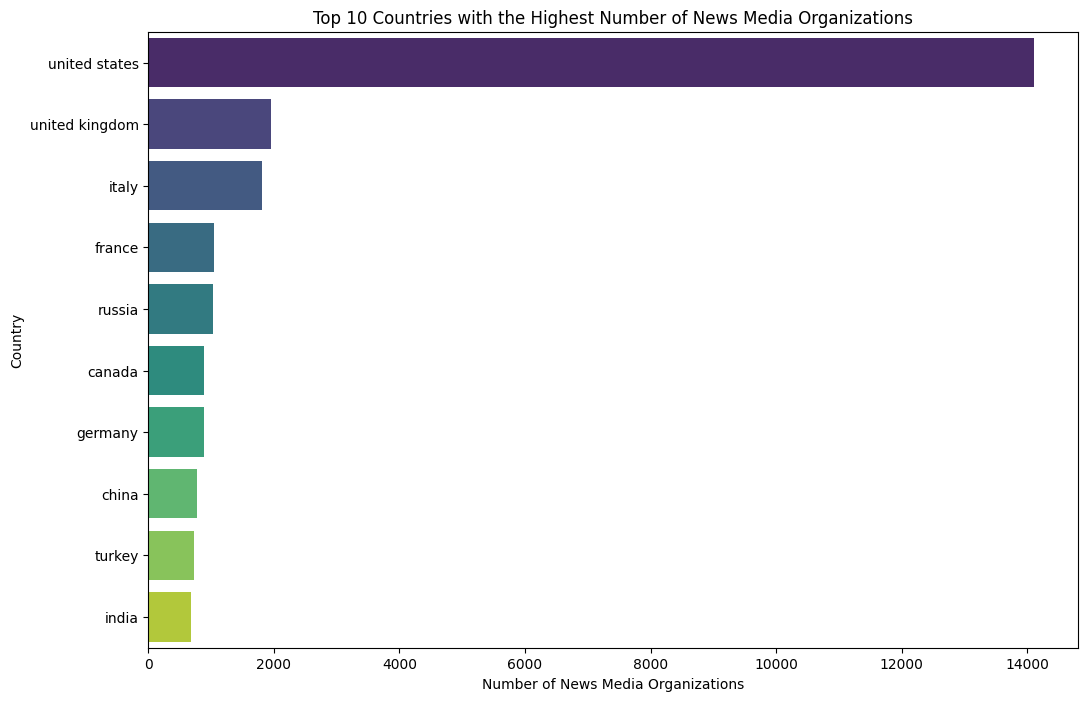

In [18]:
# Count the number of news media organizations by country
country_counts = df_domains_location['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

# Get the top 10 countries with the highest number of news media organizations
top_countries = country_counts.head(10)

# Plot the data using Seaborn and Matplotlib
plt.figure(figsize=(12, 8))
sns.barplot(data=top_countries, x='Count', y='Country', palette='viridis')
plt.title('Top 10 Countries with the Highest Number of News Media Organizations')
plt.xlabel('Number of News Media Organizations')
plt.ylabel('Country')
plt.show()

Websites Reporting About Specific Regions (Africa, US, China, etc.)

Websites Reporting About Specific Regions (Africa, North America, Asia):
         source_name                                              title  \
0          wiredcouk  Glacial Lakes Threaten Millions in a Warming W...   
1           upennedu        Middle Sinitic in Indological Transcription   
2  globalsecurityorg  WHO Regional Election Sparks Nepotism Concerns...   
3           newsitgr  Σοκαριστικές μαρτυρίες φοιτητών του Νεπάλ, που...   
5  globalsecurityorg  Washington says 9 US citizens killed in Hamas ...   

          Country         Region  
0  united kingdom         Europe  
1   united states  North America  
2   united states  North America  
3          greece         Europe  
5   united states  North America  

Number of Articles by Region:
Region
North America    9233
Europe            886
Asia              289
Name: count, dtype: int64


/tmp/ipykernel_26199/2957816972.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtered, x='Region', palette='viridis', order=region_counts.index)


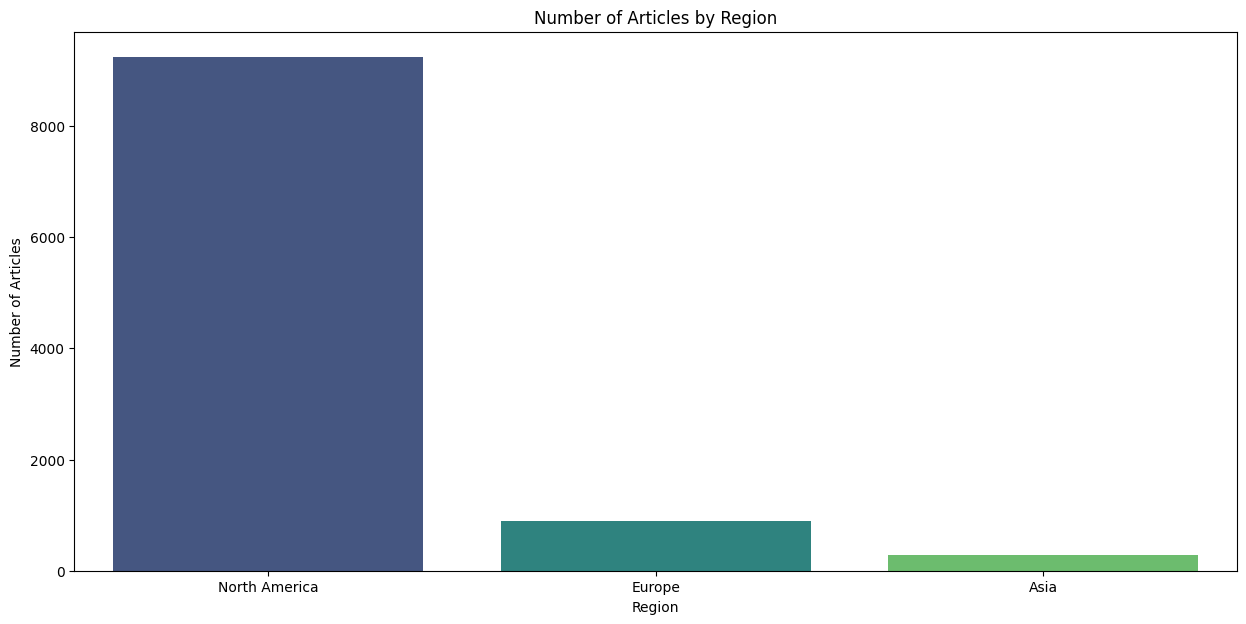

In [31]:
# Merge data based on source_name in df_data and SourceCommonName in df_domains_location
df_merged = pd.merge(df_data, df_domains_location, left_on='source_name', right_on='SourceCommonName', how='inner')


# Mapping countries to regions
region_mapping = {
    'us': 'North America', 'ca': 'North America',
    'uk': 'Europe', 'de': 'Europe', 'gm':'Europe', 'gr':'Europe', 'it': 'Europe', 'fr': 'Europe', 'up': 'Europe', 'nl': 'Europe', 'it'
    'za': 'Africa', 'eg': 'Africa', 'sg':'Africa', 'ng': 'Africa', 'ke': 'Africa', 'sf':'Africa',   
    'in': 'Asia', 'cn': 'Asia', 'rs': "Asia", 'ir': 'Asia',
    'ci': 'South America'
}

# Create a 'Region' column in the merged DataFrame based on the location
df_merged['Region'] = df_merged['location'].map(region_mapping)

# Filter the data for specific regions of interest, e.g., Africa, North America, Asia
regions_of_interest = ['Africa', 'North America', 'Asia', 'Europe']
df_filtered = df_merged[df_merged['Region'].isin(regions_of_interest)]

# Display a preview of the result
print("Websites Reporting About Specific Regions (Africa, North America, Asia):")
print(df_filtered[['source_name', 'title', 'Country', 'Region']].head())

# Count the number of articles by region
region_counts = df_filtered['Region'].value_counts()
print("\nNumber of Articles by Region:")
print(region_counts)

# Plot the data using Seaborn and Matplotlib
plt.figure(figsize=(15, 7))
sns.countplot(data=df_filtered, x='Region', palette='viridis', order=region_counts.index)
plt.title('Number of Articles by Region')
plt.xlabel('Region')
plt.ylabel('Number of Articles')
plt.show()
